In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')
from sklearn.impute import SimpleImputer

In [2]:
data = pd.read_csv('Myocardial_infarction_complications.csv')

In [3]:
imputer = SimpleImputer(strategy='median')
df_imputed = pd.DataFrame(imputer.fit_transform(data))

# Imputation removed column names hence, getting back the names
df_imputed.columns = data.columns

In [4]:
DC_Data = df_imputed[['AGE' ,'STENOK_AN' , 'FK_STENOK' ,'IBS_POST' ,'ZSN_A', 'nr_04' , 'S_AD_KBRIG' , 'D_AD_KBRIG',
'S_AD_ORIT' , 'D_AD_ORIT' , 'K_SH_POST' ,'ant_im' , 'lat_im' , 'ritm_ecg_p_07' , 'n_r_ecg_p_04' , 'n_p_ecg_p_10' , 
'n_p_ecg_p_12' ,'K_BLOOD' ,'NA_BLOOD' ,'ALT_BLOOD','AST_BLOOD' ,'L_BLOOD' , 'ROE' , 'TIME_B_S' , 'R_AB_1_n' , 'R_AB_3_n' 
,'NA_KB','NOT_NA_KB', 'NITR_S' , 'NA_R_1_n' , 'GEPAR_S_n' ,'RAZRIV' ,'DRESSLER' ,'ZSN','REC_IM','LET_IS']]
DC_Data

,AGE,STENOK_AN,FK_STENOK,IBS_POST,ZSN_A,nr_04,S_AD_KBRIG,D_AD_KBRIG,S_AD_ORIT,D_AD_ORIT,...,NA_KB,NOT_NA_KB,NITR_S,NA_R_1_n,GEPAR_S_n,RAZRIV,DRESSLER,ZSN,REC_IM,LET_IS
0,77.0,1.0,1.0,2.0,0.0,0.0,140.0,80.0,180.0,100.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,55.0,0.0,0.0,0.0,0.0,0.0,140.0,80.0,120.0,90.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,52.0,0.0,0.0,2.0,0.0,0.0,150.0,100.0,180.0,100.0,...,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,68.0,0.0,0.0,2.0,1.0,0.0,140.0,80.0,120.0,70.0,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,60.0,0.0,0.0,2.0,0.0,0.0,190.0,100.0,160.0,90.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,4.0,2.0,1.0,0.0,0.0,140.0,80.0,110.0,70.0,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0
1696,70.0,6.0,2.0,1.0,0.0,0.0,140.0,80.0,50.0,0.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1697,55.0,6.0,2.0,2.0,0.0,0.0,140.0,80.0,70.0,50.0,...,1.0,1.0,1.0,2.0,1.0,0.0,0.0,0.0,1.0,6.0
1698,79.0,2.0,2.0,1.0,0.0,1.0,140.0,80.0,110.0,70.0,...,1.0,0.0,1.0,2.0,1.0,0.0,0.0,0.0,0.0,1.0


In [5]:
DC_Data.shape

(1700, 36)

In [6]:
#array = DC_Data.values
X = DC_Data.loc[:, DC_Data.columns != 'LET_IS']
X.head()

#X = array[:,0:35]
#Y = array[:,35]
X.shape

(1700, 35)

In [7]:
Y = DC_Data['LET_IS']
Y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: LET_IS, dtype: float64

In [8]:
from sklearn.model_selection  import  train_test_split
x_train , x_test , y_train , y_test = train_test_split(X , Y , test_size = 0.25, random_state = 0)

In [9]:
print(x_test.shape)

(425, 35)


In [10]:
# Random Forest Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
num_trees = 10
model_rf = RandomForestClassifier(n_estimators = num_trees, criterion = 'entropy', random_state = 0)
results_rf = cross_val_score(model_rf, x_train, y_train, cv=10)
print(results_rf.mean())

0.8902312992125984


In [11]:
model_rf.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [12]:
#Predict for X dataset
y_pred_rf = model_rf.predict(x_test)

Text(69.0, 0.5, 'Truth')

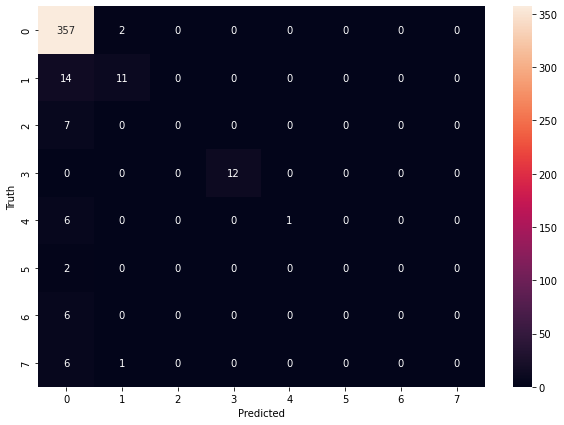

In [13]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix, accuracy_score
cm_rf = confusion_matrix(y_test,y_pred_rf)
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm_rf, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [14]:
print(accuracy_score(y_test , y_pred_rf))

0.8964705882352941


In [15]:
#Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

         0.0       0.90      0.99      0.94       359
         1.0       0.79      0.44      0.56        25
         2.0       0.00      0.00      0.00         7
         3.0       1.00      1.00      1.00        12
         4.0       1.00      0.14      0.25         7
         5.0       0.00      0.00      0.00         2
         6.0       0.00      0.00      0.00         6
         7.0       0.00      0.00      0.00         7

    accuracy                           0.90       425
   macro avg       0.46      0.32      0.34       425
weighted avg       0.85      0.90      0.86       425



In [16]:
#save model in output directory
import joblib
joblib.dump(model_rf,'./flask-app/output/randomforest_model.pkl')

['./flask-app/output/randomforest_model.pkl']

In [17]:
import numpy as np
test_data = [77, 1, 1, 2, 0, 0, 140,80,180,100,0,1,0,1,0,0,0,4.7,138,0.38,0.22,8,16,4,0,1,1,1,0,0,1,0,0,0,0]

#test_data =['77', '1', '1', '2', '0', '0', '140', '80', '180', '100', '0', '1', '0', '1', '0', '0', '0', '4.7', '138', '0.38', '0.22', '8', '16', '4', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0']

#convert test_data into numpy array
test_data = np.array(test_data)
#reshape
test_data = test_data.reshape(1,-1)
print(test_data)

[[ 77.     1.     1.     2.     0.     0.   140.    80.   180.   100.
    0.     1.     0.     1.     0.     0.     0.     4.7  138.     0.38
    0.22   8.    16.     4.     0.     1.     1.     1.     0.     0.
    1.     0.     0.     0.     0.  ]]


In [18]:
#declare path where you saved your model
outFileFolder = 'flask-app/output/'
filePath = outFileFolder + 'randomforest_model.pkl'
#open file
file = open(filePath, "rb")
#load the trained model
trained_model = joblib.load(file)

In [19]:
prediction = trained_model.predict(test_data)
print(prediction)

[0.]
